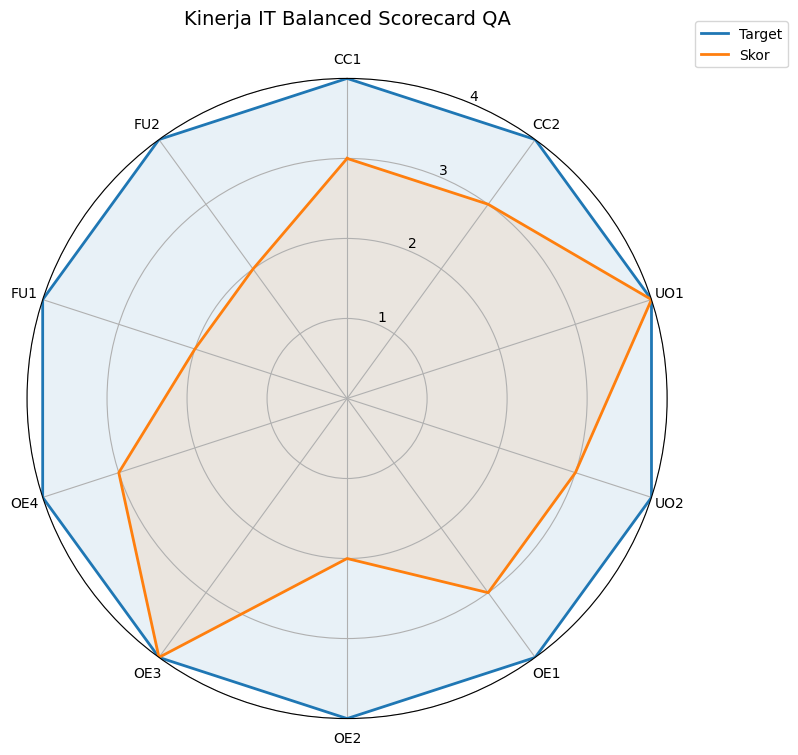

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# DATA
# =========================
labels = [
    "CC1", "CC2", "UO1", "UO2",
    "OE1", "OE2", "OE3", "OE4",
    "FU1", "FU2"
]

target = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
skor   = [3, 3, 4, 3, 3, 2, 4, 3, 2, 2]

# =========================
# PREPARATION
# =========================
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Tutup polygon (harus diulang elemen pertama)
angles += angles[:1]
target += target[:1]
skor += skor[:1]

# =========================
# PLOT
# =========================
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot Target
ax.plot(angles, target, linewidth=2, label="Target")
ax.fill(angles, target, alpha=0.1)

# Plot Skor
ax.plot(angles, skor, linewidth=2, label="Skor")
ax.fill(angles, skor, alpha=0.1)

# =========================
# AXIS & LABEL SETTING
# =========================
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

ax.set_ylim(0, 4)
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["1", "2", "3", "4"])

# =========================
# TITLE & LEGEND
# =========================
ax.set_title(
    "Kinerja IT Balanced Scorecard QA",
    size=14,
    pad=20
)

ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()
